### Indicator Features

In [2]:
import pandas as pd
import statsmodels.formula.api as sm  # this library will be used to demonstrate Indicator features.

In [3]:
# The medical costs dataset "insurance.csv" can be downloaded from Github.com and loaded into a Pandas DataFrame using this codeline. 
# med_cost_DF = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
med_cost_DF = pd.read_csv("insurance_data.csv")

In [42]:
med_cost_DF

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
med_cost_DF2 = pd.get_dummies(data=med_cost_DF,columns=["region"],dtype=bool)
med_cost_DF2

,Unnamed: 0,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,1336,21,female,25.800,0,no,2007.94500,False,False,False,True


In [5]:
#Create indicator feature DataFrame with integer values instead of boolean
#(True:1, False:0)
med_cost_DF3 = pd.get_dummies(data=med_cost_DF,columns=["region"],dtype=int)
med_cost_DF3

,Unnamed: 0,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [6]:
#use the Indicator Features in Ordinary Least Square regerssion model
regr_model = sm.ols(formula="charges ~ region_northeast + region_northwest + region_southeast + region_southwest",data=med_cost_DF3).fit()

print("******Regression Model Parameters*******")
print(regr_model.params)
print("******Regression Model Summary*******")
print(regr_model.summary())


******Regression Model Parameters*******
Intercept           1.077187e+17
region_northeast   -1.077187e+17
region_northwest   -1.077187e+17
region_southeast   -1.077187e+17
region_southwest   -1.077187e+17
dtype: float64
******Regression Model Summary*******
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.861
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.115
Time:                        22:57:18   Log-Likelihood:                -14474.
No. Observations:                1338   AIC:                         2.896e+04
Df Residuals:                    1333   BIC:                         2.898e+04
Df Model:                           4                                         
Covariance Type:            no

In [7]:
#Training the regression model for smokers only.
#Creating a subset of the DataFrame for smokers
med_cost_DF4 = med_cost_DF3.loc[med_cost_DF3["smoker"]=="yes"]
med_cost_DF4

,Unnamed: 0,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,female,27.900,0,yes,16884.92400,0,0,0,1
11,11,62,female,26.290,0,yes,27808.72510,0,0,1,0
14,14,27,male,42.130,0,yes,39611.75770,0,0,1,0
19,19,30,male,35.300,0,yes,36837.46700,0,0,0,1
23,23,34,female,31.920,1,yes,37701.87680,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1313,1313,19,female,34.700,2,yes,36397.57600,0,0,0,1
1314,1314,30,female,23.655,3,yes,18765.87545,0,1,0,0
1321,1321,62,male,26.695,0,yes,28101.33305,1,0,0,0
1323,1323,42,female,40.370,2,yes,43896.37630,0,0,1,0


In [8]:
#Train the OLS regression model for smoker dataframe
regr_model2 = sm.ols(formula="charges ~ region_northeast + region_northwest + region_southeast + region_southwest",data=med_cost_DF4).fit()

print("******Regression Model Parameters*******")
print(regr_model2.params)
print("******Regression Model Summary*******")
print(regr_model2.summary())

******Regression Model Parameters*******
Intercept           25395.919994
region_northeast     4277.616478
region_northwest     4796.083188
region_southeast     9449.076829
region_southwest     6873.143499
dtype: float64
******Regression Model Summary*******
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.316
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0205
Time:                        22:57:48   Log-Likelihood:                -2946.2
No. Observations:                 274   AIC:                             5900.
Df Residuals:                     270   BIC:                             5915.
Df Model:                           3                                         
Covariance Type:            no

In [9]:
#Training the regression model for non-smokers only.
#Creating a subset of the DataFrame for smokers
med_cost_DF5 = med_cost_DF3.loc[med_cost_DF3["smoker"]=="no"]
med_cost_DF5

regr_model3 = sm.ols(formula="charges ~ region_northeast + region_northwest + region_southeast + region_southwest",data=med_cost_DF5).fit()

print("******Regression Model Parameters*******")
print(regr_model3.params)
print("******Regression Model Summary*******")
print(regr_model3.summary())

******Regression Model Parameters*******
Intercept           7.576444e+15
region_northeast   -7.576444e+15
region_northwest   -7.576444e+15
region_southeast   -7.576444e+15
region_southwest   -7.576444e+15
dtype: float64
******Regression Model Summary*******
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.608
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.170
Time:                        22:57:52   Log-Likelihood:                -10761.
No. Observations:                1064   AIC:                         2.153e+04
Df Residuals:                    1059   BIC:                         2.156e+04
Df Model:                           4                                         
Covariance Type:            no

In [10]:
#Using the original DataFrame
regr_model4 = sm.ols(formula="charges ~ C(region)", data=med_cost_DF).fit()

print("******Regression Model Parameters*******")
print(regr_model4.params)
print("******Regression Model Summary*******")
print(regr_model4.summary())


******Regression Model Parameters*******
Intercept                 13406.384516
C(region)[T.northwest]     -988.809142
C(region)[T.southeast]     1329.026921
C(region)[T.southwest]    -1059.447139
dtype: float64
******Regression Model Summary*******
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.970
Date:                Thu, 29 May 2025   Prob (F-statistic):             0.0309
Time:                        22:57:55   Log-Likelihood:                -14473.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1334   BIC:                         2.898e+04
Df Model:                           3                                         
Covariance Type:            nonrobust  

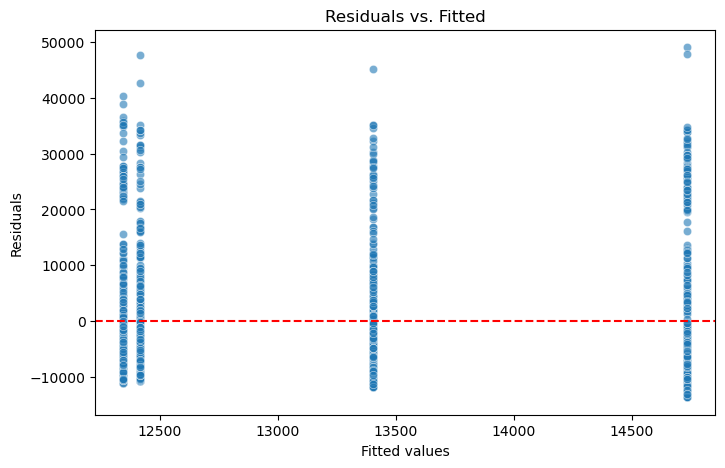

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitted values
fitted_vals1 = regr_model4.fittedvalues
# Residuals
residuals1 = regr_model4.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals1, y=residuals1, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


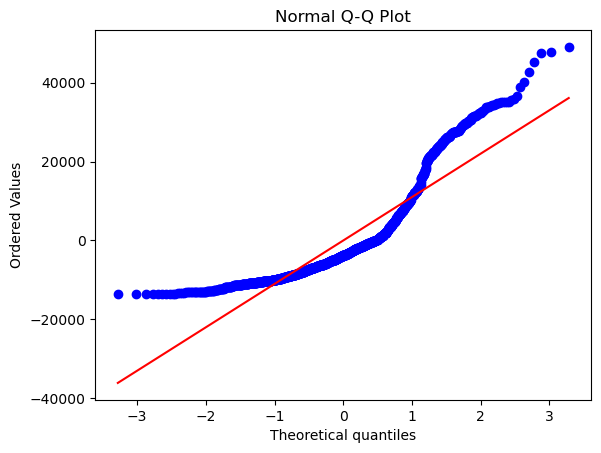

In [13]:
#Check if residuals are normally distributed
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

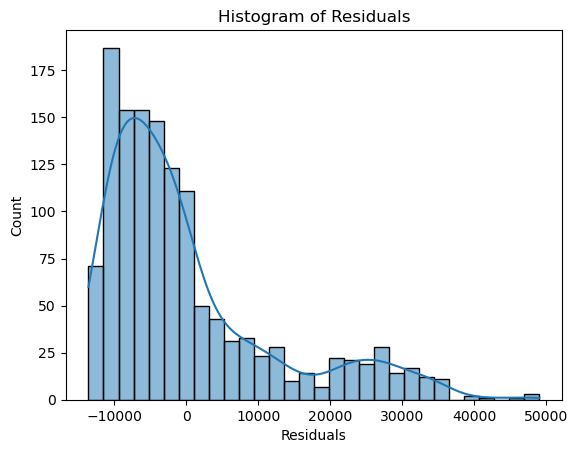

In [14]:
#Histogram of residuals
sns.histplot(residuals1, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


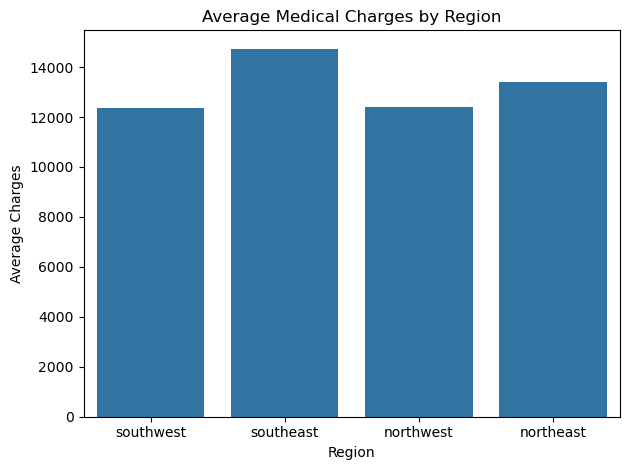

In [15]:
#Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of mean charges by region
sns.barplot(x="region", y="charges", data=med_cost_DF, estimator='mean', errorbar=None)
plt.title("Average Medical Charges by Region")
plt.ylabel("Average Charges")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


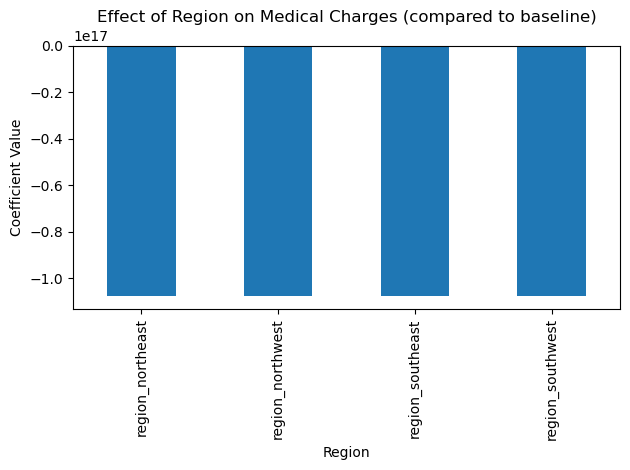

In [16]:
#Viusalizing the regression coefficients
# Extract coefficients for visualization
coefs = regr_model.params.drop('Intercept')

coefs.plot(kind='bar')
plt.title("Effect of Region on Medical Charges (compared to baseline)")
plt.ylabel("Coefficient Value")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


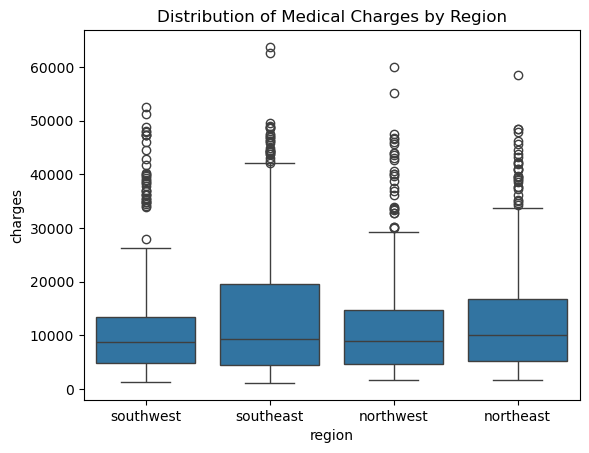

In [17]:
#Visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="region", y="charges", data=med_cost_DF)
plt.title("Distribution of Medical Charges by Region")
plt.show()


In [18]:
#Improved Model
import statsmodels.formula.api as smf

# Full regression model with multiple predictors
model_full = smf.ols(
    formula="charges ~ age + bmi + children + C(sex) + C(smoker) + C(region)",
    data=med_cost_DF
).fit()


print("******Regression Model Parameters*******")
print(model_full.params)
print("******Regression Model Summary*******")
print(model_full.summary())



******Regression Model Parameters*******
Intercept                -11938.538576
C(sex)[T.male]             -131.314359
C(smoker)[T.yes]          23848.534542
C(region)[T.northwest]     -352.963899
C(region)[T.southeast]    -1035.022049
C(region)[T.southwest]     -960.050991
age                         256.856353
bmi                         339.193454
children                    475.500545
dtype: float64
******Regression Model Summary*******
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        22:58:57   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df

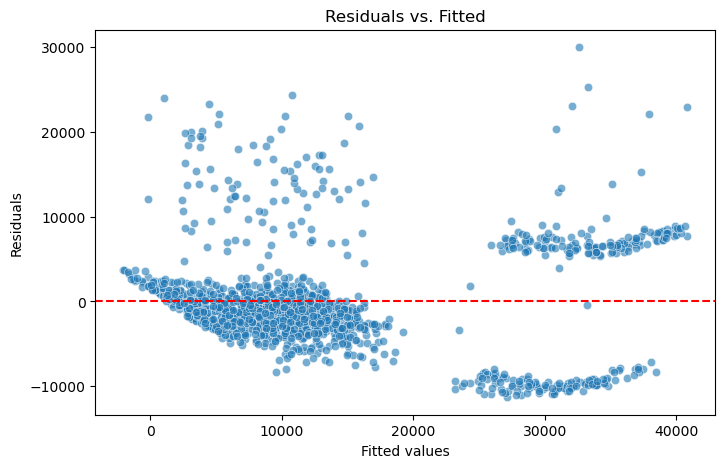

In [19]:
#Visualize the regression model
import matplotlib.pyplot as plt
import seaborn as sns

# Fitted values
fitted_vals = model_full.fittedvalues
# Residuals
residuals = model_full.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


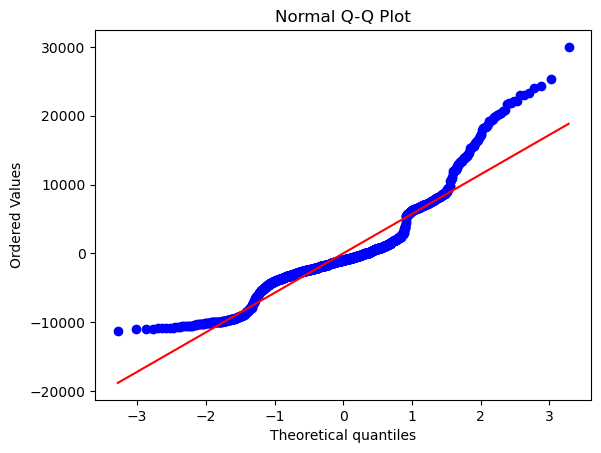

In [20]:
#Check if residuals are normally distributed
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()


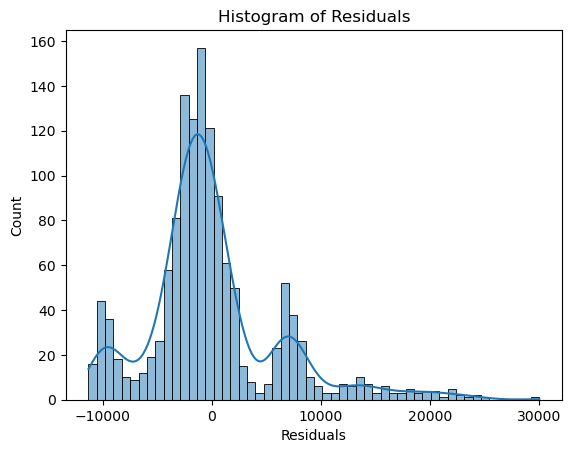

In [21]:
#Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


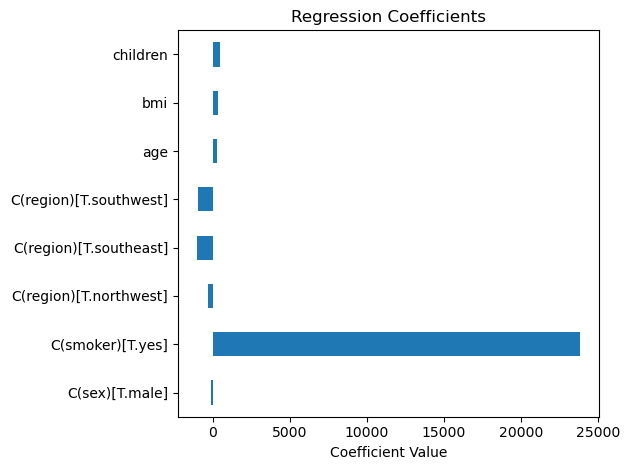

In [22]:
#Visualize coefficients
model_full.params.drop("Intercept").plot(kind="barh")
plt.title("Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()
